In [5]:
import numpy as np
import pandas as pd
import comonotonic as cm
import os
from sklearn.model_selection import train_test_split
import copy
import utils
import matplotlib.pyplot as plt

In [6]:
# Note that we assume the last column is the label
# If the first column is ID's, remove it
filename = "heart.csv"
df = pd.read_csv("Datasets/"+filename)
colnames = [('X'+str(i)) for i in range(df.shape[1]-1)]
colnames.append('Y')
df.columns = colnames
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


0.5245901639344263

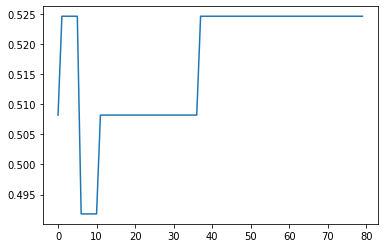

In [7]:
# use the original data for Naive Bayes
original_X = df[colnames[:-1]].to_numpy()
original_Y = df[colnames[-1]].to_numpy()
original_X_train, original_X_test, original_Y_train, original_Y_test = train_test_split(original_X, original_Y, test_size=0.2, random_state=42)


df_copy = df.copy()

# continuous variables;
cont_col = [0,3,4,7,9]
num_categories_list = [2,3,4,5,6,7,8,9,10,11,12]
# unrankable columns
unrankable = [1,2,6]
allocation_book, accuracy_history = utils.determine_allocation(cont_col, num_categories_list,
                                                               df_copy, unrankable, colnames, max_itr = 80,
                                                               temp = 1, anneal_schedule = 10)
plt.plot(accuracy_history)
utils.accuracy_test(allocation_book, df_copy, unrankable, colnames)

In [8]:
# comparation with Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(original_X_train, original_Y_train)
pred = model.predict(original_X_test)
utils.get_accuracy(pred, original_Y_test)

0.8688524590163934